In [1]:
import copy as cp
import numpy as np
import matplotlib as mt
import matplotlib.pyplot as plt 
from matplotlib.ticker import AutoMinorLocator, MaxNLocator
import sklearn as skl
import pickle as pkl
import shap
from tqdm import tqdm

In [2]:
import sys
sys.path.append('../../0_python_modules/')
import extras
import metrics
import navjeet_hist as nh

## f1 supervised

In [3]:
randoms = np.loadtxt('../../1_datasets/randoms.txt', dtype=int)

In [7]:
asupervised = np.load('../saved_supervised/accu_supervised.npy')

In [8]:
asupervised = np.mean(asupervised[:,1])
asupervised

0.9507870754873124

In [52]:
isupervised = [np.load(f'../saved_supervised/fimp_supervised_{i}.npy').argsort()[::-1] for i in range(5)]

In [197]:
fsupervised = [np.load(f'../saved_supervised/fimp_supervised_{i}.npy') for i in range(5)]
fsupervised = np.mean(fsupervised, axis=0), np.std(fsupervised, axis=0)

In [53]:
ipermute = [np.load(f'../saved_furf/fimp_hlabel2_{i}.npy').argsort()[::-1] for i in range(5)]

In [89]:
irandom = []
for i in randoms:
    np.random.seed(i)
    ff = np.random.random(size=isupervised[0].shape[0])
    ff = ff/ff.sum()
    irandom.append(ff.argsort()[::-1])
irandom = np.array(irandom)

In [220]:
np.save('saved_fimp/irandom.npy', irandom)

In [100]:
srandom_supervised = np.zeros((755, 2)) + np.nan
for f in range(1,755+1):
    cc = []
    for i in range(5):
        ii = irandom[i][:f]
        for j in range(5):
            jj = isupervised[j][:f]
            cc.append(np.intersect1d(ii,jj).shape[0])
    srandom_supervised[f-1] = [np.mean(cc), np.std(cc)]

In [101]:
srandom_permute = np.zeros((755, 2)) + np.nan
for f in range(1,755+1):
    cc = []
    for i in range(5):
        ii = irandom[i][:f]
        for j in range(5):
            jj = ipermute[j][:f]
            cc.append(np.intersect1d(ii,jj).shape[0])
    srandom_permute[f-1] = [np.mean(cc), np.std(cc)]

# train_loo

In [4]:
atrain = np.concatenate(([ np.load(f'1_train_loo/saved_training/accu{i}_test.npy')[:,:,1] for i in range(1,5) ]))

In [9]:
atrain = asupervised - atrain

In [59]:
itrain = [atrain[:,i].argsort()[::-1] for i in range(5)]

In [221]:
np.save('saved_fimp/itrain.npy', itrain)

In [107]:
strain_supervised = np.zeros((755,2)) + np.nan
for f in range(1,755+1):
    cc = []
    for i in range(5):
        ii = itrain[i][:f]
        for j in range(5):
            jj = isupervised[j][:f]
            cc.append(np.intersect1d(ii,jj).shape[0])
    strain_supervised[f-1] = [np.mean(cc), np.std(cc)]

In [108]:
strain_permute = np.zeros((755,2)) + np.nan
for f in range(1,755+1):
    cc = []
    for i in range(5):
        ii = itrain[i][:f]
        for j in range(5):
            jj = ipermute[j][:f]
            cc.append(np.intersect1d(ii,jj).shape[0])
    strain_permute[f-1] = [np.mean(cc), np.std(cc)]

## predict_loo

In [73]:
apredict = np.array([ np.load(f'2_predict_loo/saved_predict/accu_test_{i}.npy')[:,:,1] for i in [-1,10] ])

In [76]:
apredict = np.mean(apredict, axis=0)

In [78]:
apredict = asupervised - apredict

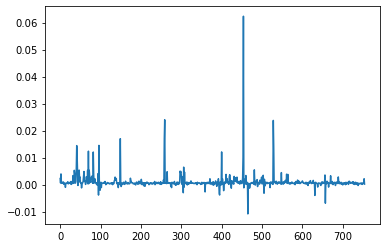

In [83]:
plt.plot(apredict[2])

In [84]:
ipredict = [i.argsort()[::-1] for i in apredict]

In [222]:
np.save('saved_fimp/ipredict.npy', ipredict)

In [109]:
spredict_supervised = np.zeros((755,2)) + np.nan
for f in range(1,755+1):
    cc = []
    for i in range(5):
        ii = ipredict[i][:f]
        for j in range(5):
            jj = isupervised[j][:f]
            cc.append(np.intersect1d(ii,jj).shape[0])
    spredict_supervised[f-1] = [np.mean(cc), np.std(cc)]

In [110]:
spredict_permute = np.zeros((755,2)) + np.nan
for f in range(1,755+1):
    cc = []
    for i in range(5):
        ii = ipredict[i][:f]
        for j in range(5):
            jj = ipermute[j][:f]
            cc.append(np.intersect1d(ii,jj).shape[0])
    spredict_permute[f-1] = [np.mean(cc), np.std(cc)]

## shap

In [198]:
fshap = [
    np.mean( np.abs(np.load(f'3_shap/saved_shap/shap_values_supervised{i}.npy')), axis=0)
for i in range(5)]

In [199]:
ishap = [
    i.argsort()[::-1]
for i in fshap]

In [223]:
np.save('saved_fimp/ishap.npy', ishap)

In [203]:
fshap = np.mean(fshap, axis=0), np.std(fshap, axis=0)

In [166]:
sshap_supervised = np.zeros((755,2)) + np.nan
for f in range(1,755+1):
    cc = []
    for i in range(5):
        ii = ishap[i][:f]
        for j in range(5):
            jj = isupervised[j][:f]
            cc.append(np.intersect1d(ii,jj).shape[0])
    sshap_supervised[f-1] = [np.mean(cc), np.std(cc)]

In [167]:
sshap_permute = np.zeros((755,2)) + np.nan
for f in range(1,755+1):
    cc = []
    for i in range(5):
        ii = ishap[i][:f]
        for j in range(5):
            jj = ipermute[j][:f]
            cc.append(np.intersect1d(ii,jj).shape[0])
    sshap_permute[f-1] = [np.mean(cc), np.std(cc)]

In [114]:
ashap = np.load('3_shap/saved_shap/shap_values_supervised0.npy')

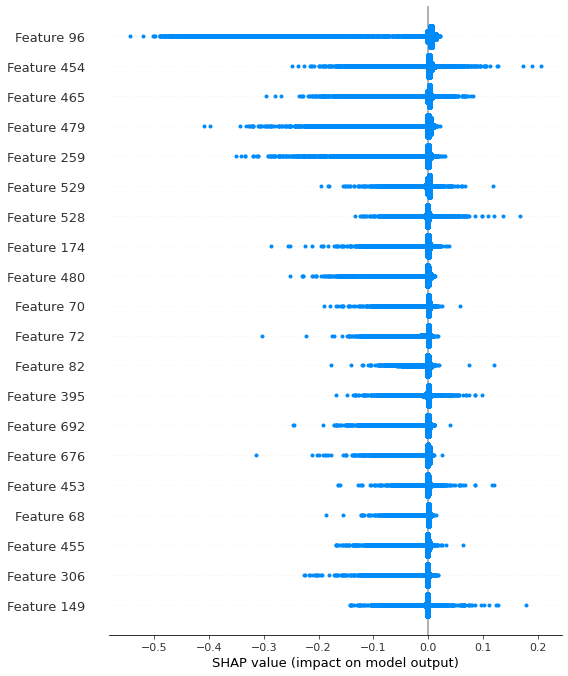

In [155]:
shap.summary_plot(ashap, plot_type='dot')

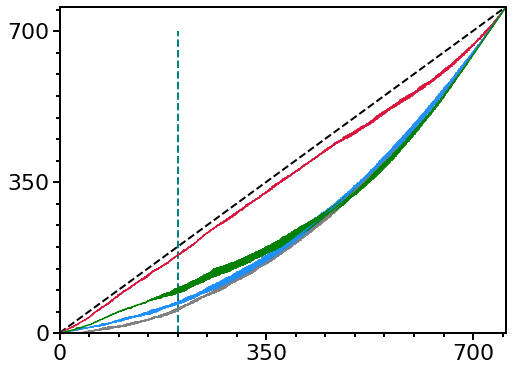

In [181]:
fig,ax=plt.subplots(figsize=(8,6))
ax.plot(range(1,756), ls='--', c='black', lw=2)
ax.plot([200,200],[0,700], lw=2, ls='--', c='teal')
plt.errorbar(range(1,756), srandom_supervised[:,0], yerr=srandom_supervised[:,1], c='gray')
plt.errorbar(range(1,756), sshap_supervised[:,0], yerr=sshap_supervised[:,1], c='crimson')
plt.errorbar(range(1,756), strain_supervised[:,0], yerr=strain_supervised[:,1], c='dodgerblue')
plt.errorbar(range(1,756), spredict_supervised[:,0], yerr=spredict_supervised[:,1], c='green')
#
ax.set_xlim(0,756)
ax.set_ylim(0,756)
ax.set_yticks([0,350,700])
ax.set_xticks([0,350,700])
ax.spines[:].set_linewidth(2)
ax.xaxis.set_minor_locator(AutoMinorLocator(7))
ax.yaxis.set_minor_locator(AutoMinorLocator(7))
ax.tick_params(labelsize=22, length=7, width=2, )
ax.tick_params(which='minor', length=4, width=2)
plt.savefig(f'plots/nfeatures_supervised.pdf')
plt.show()

In [184]:
sshap_supervised[199]

array([181.6       ,   1.49666295])

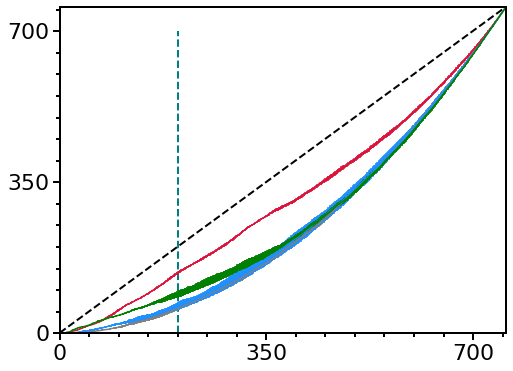

In [182]:
fig,ax=plt.subplots(figsize=(8,6))
ax.plot(range(1,756), ls='--', c='black', lw=2)
ax.plot([200,200],[0,700], lw=2, ls='--', c='teal')
plt.errorbar(range(1,756), srandom_permute[:,0], yerr=srandom_permute[:,1], c='gray')
plt.errorbar(range(1,756), sshap_permute[:,0], yerr=sshap_permute[:,1], c='crimson')
plt.errorbar(range(1,756), strain_permute[:,0], yerr=strain_permute[:,1], c='dodgerblue')
plt.errorbar(range(1,756), spredict_permute[:,0], yerr=spredict_permute[:,1], c='green')
#
ax.set_xlim(0,756)
ax.set_ylim(0,756)
ax.set_yticks([0,350,700])
ax.set_xticks([0,350,700])
ax.spines[:].set_linewidth(2)
ax.xaxis.set_minor_locator(AutoMinorLocator(7))
ax.yaxis.set_minor_locator(AutoMinorLocator(7))
ax.tick_params(labelsize=22, length=7, width=2, )
ax.tick_params(which='minor', length=4, width=2)
plt.savefig(f'plots/nfeatures_permute.pdf')
plt.show()

In [192]:
sshap_permute[199]

array([140.04      ,   2.90489242])

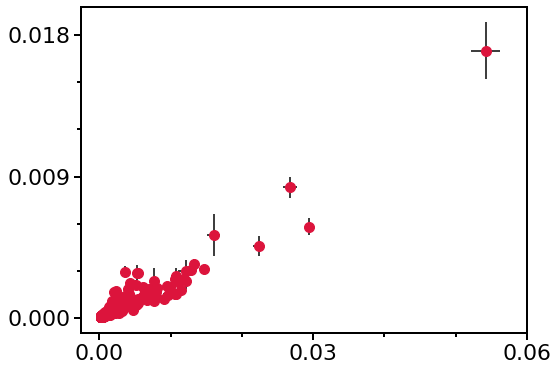

In [218]:
fig,ax=plt.subplots(figsize=(8,6))
ax.errorbar(fsupervised[0], fshap[0], fmt='o', ms=10, c='crimson',
           xerr=fsupervised[1], yerr=fshap[1], ecolor='black')
#
ax.set_yticks([0,0.009,0.018])
ax.set_xticks([0,0.03,0.06])
ax.spines[:].set_linewidth(2)
ax.xaxis.set_minor_locator(AutoMinorLocator(3))
ax.yaxis.set_minor_locator(AutoMinorLocator(3))
ax.tick_params(labelsize=22, length=7, width=2, )
ax.tick_params(which='minor', length=4, width=2)
plt.savefig(f'plots/fimp_shap_supervised.pdf')
plt.show()

## hists

In [3]:
hrandom = np.load('saved_fimp/hists_irandom.npy')
htrain = np.load('saved_fimp/hists_itrain.npy')
hpredict = np.load('saved_fimp/hists_ipredict.npy')
hshap = np.load('saved_fimp/hists_ishap.npy')

In [4]:
erandom = np.load('saved_fimp/extents_irandom.npy')
etrain = np.load('saved_fimp/extents_itrain.npy')
epredict = np.load('saved_fimp/extents_ipredict.npy')
eshap = np.load('saved_fimp/extents_ishap.npy')

In [5]:
weight = np.loadtxt('../traj_specific_data/distances0.xvg', comments=['@','#'], usecols=[3])
weight = np.where(weight<0.6)[0].shape[0] / weight.shape[0]
weight

0.06585091371181798

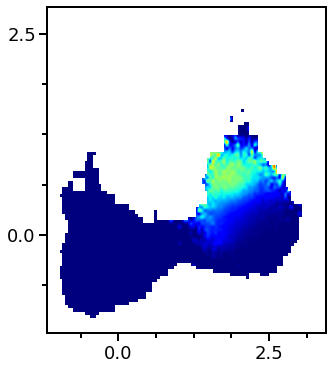

In [240]:
fig,ax = plt.subplots(1,figsize=(5,6))
ax.spines[:].set_linewidth(2)
ax.tick_params(length=8, width=2, labelsize=18)
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_major_locator(mt.ticker.MaxNLocator(2))
ax.xaxis.set_major_locator(mt.ticker.MaxNLocator(2))
ax.tick_params(which='minor', length=5, width=2)
i=4
ax.imshow(hrandom[i].T, 
          aspect='auto', extent=erandom[i], origin='lower', interpolation='gaussian',
          cmap='jet', vmin=0, vmax=1)
# plt.savefig(f'plots/random{i}.pdf')
plt.show()

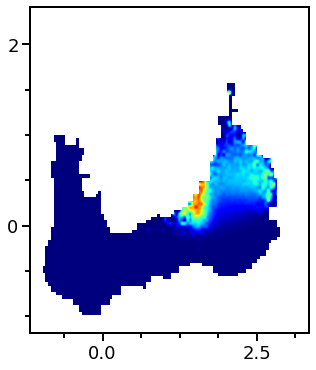

In [245]:
fig,ax = plt.subplots(1,figsize=(5,6))
ax.spines[:].set_linewidth(2)
ax.tick_params(length=8, width=2, labelsize=18)
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_major_locator(mt.ticker.MaxNLocator(2))
ax.xaxis.set_major_locator(mt.ticker.MaxNLocator(2))
ax.tick_params(which='minor', length=5, width=2)
i=0
ax.imshow(htrain[i].T, 
          aspect='auto', extent=etrain[i], origin='lower', interpolation='gaussian',
          cmap='jet', vmin=0, vmax=1)
# plt.savefig(f'plots/train{i}.pdf')
plt.show()

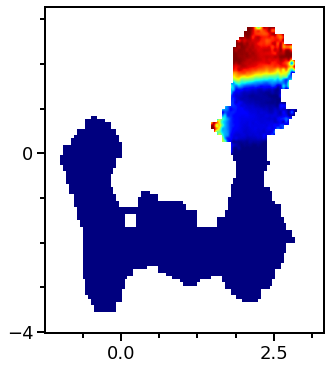

In [250]:
fig,ax = plt.subplots(1,figsize=(5,6))
ax.spines[:].set_linewidth(2)
ax.tick_params(length=8, width=2, labelsize=18)
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_major_locator(mt.ticker.MaxNLocator(2))
ax.xaxis.set_major_locator(mt.ticker.MaxNLocator(2))
ax.tick_params(which='minor', length=5, width=2)
i=4
ax.imshow(hpredict[i].T, 
          aspect='auto', extent=epredict[i], origin='lower', interpolation='gaussian',
          cmap='jet', vmin=0, vmax=1)
# plt.savefig(f'plots/predict{i}.pdf')
plt.show()

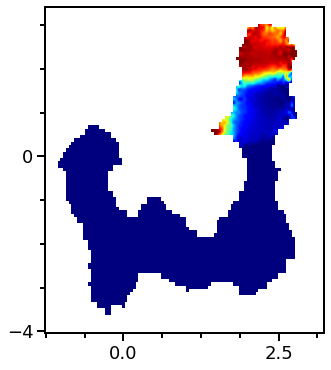

In [255]:
fig,ax = plt.subplots(1,figsize=(5,6))
ax.spines[:].set_linewidth(2)
ax.tick_params(length=8, width=2, labelsize=18)
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_major_locator(mt.ticker.MaxNLocator(2))
ax.xaxis.set_major_locator(mt.ticker.MaxNLocator(2))
ax.tick_params(which='minor', length=5, width=2)
i=4
ax.imshow(hshap[i].T, 
          aspect='auto', extent=eshap[i], origin='lower', interpolation='gaussian',
          cmap='jet', vmin=0, vmax=1)
# plt.savefig(f'plots/shap{i}.pdf')
plt.show()

In [6]:
crandom = [nh.classification_extent(i, cutoff=0.1, strategy='weighted',
                                   output_type='jm', operation=2, jm_lower=weight, jm_impure=0.44)
          for i in hrandom]

In [7]:
ctrain = [nh.classification_extent(i, cutoff=0.1, strategy='weighted',
                                   output_type='jm', operation=2, jm_lower=weight, jm_impure=0.44)
          for i in htrain]

In [8]:
cpredict = [nh.classification_extent(i, cutoff=0.1, strategy='weighted',
                                   output_type='jm', operation=2, jm_lower=weight, jm_impure=0.44)
          for i in hpredict]

In [9]:
cshap = [nh.classification_extent(i, cutoff=0.1, strategy='weighted',
                                   output_type='jm', operation=2, jm_lower=weight, jm_impure=0.44)
          for i in hshap]

In [10]:
crandom

[0.5182385232115668,
 0.652717849581512,
 0.6074801699095499,
 0.11097630802499203,
 0.16654376456241635]

In [11]:
ctrain

[0.20180773998629245,
 0.6674091355641534,
 0.6165762646161954,
 0.549591188869991,
 0.7410003348512793]

In [12]:
cpredict

[0.6212278962859582,
 0.6690874212200548,
 0.7249756862210704,
 0.7914502272984739,
 0.7180059491232647]

In [13]:
cshap

[0.7328929640304099,
 0.7406952374645333,
 0.7516511099225394,
 0.7110402434499836,
 0.7346443398919038]

In [14]:
np.mean(crandom)

0.41119132305800743

In [15]:
np.std(crandom)

0.2272905456030501

In [18]:
sc.stats.sem(crandom)

0.11364527280152505